<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [6]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context

NameError: name 'ssl' is not defined

In [113]:
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

### Посмотреть первые несколько рядов таблицы

In [114]:
df = df.fillna(0)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


### Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [79]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,78.500000,77.500000,77.500000,77.500000,77.500000,70.679487,77.500000,74.538462,72.596154
std,45.177428,45.177428,45.177428,45.177428,45.177428,45.177428,44.884222,45.177428,45.112531,45.017814
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,39.750000,38.750000,38.750000,38.750000,38.750000,31.750000,38.750000,35.750000,33.750000
50%,78.500000,78.500000,77.500000,77.500000,77.500000,77.500000,70.500000,77.500000,74.500000,72.500000
75%,117.250000,117.250000,116.250000,116.250000,116.250000,116.250000,109.250000,116.250000,113.250000,111.250000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


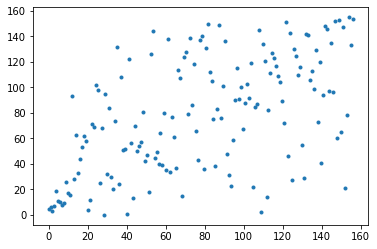

In [80]:
len_column = len(df['Freedom']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, df['Freedom'], marker='.')

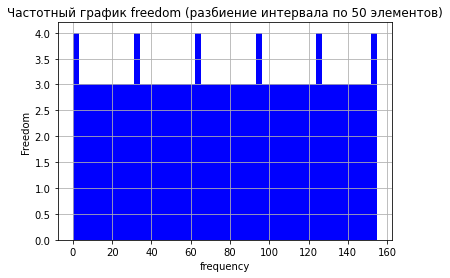

In [81]:
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

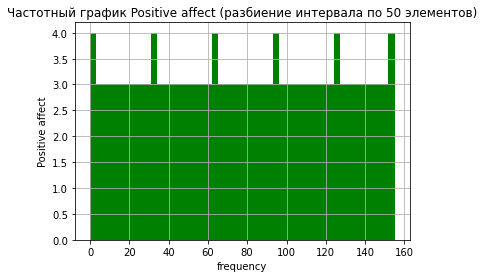

In [82]:
n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Можно сделать вывод, что в обоих случаях имеет место ***РАВНОМЕРНОЕ*** распределение. 

</br>

### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [105]:
freedom = df['Freedom']
num_freedom = len(freedom)
sorted_freedom = sorted(freedom)

middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]

print('Медиана: ', result)

Медиана:  71.0


In [84]:
print('Значение моды: ', statistics.mode(freedom))

Значение моды:  5.0


### Почему нельзя найти моду?

Нельзя выделить конкретное значение в качестве моды, так как имеет место равномерное распределение значений. 

In [85]:
mean_freedom = statistics.mean(df['Freedom'])
print(f'Математическое ожидание равно: {mean_freedom}')

Математическое ожидание равно: 77.5


In [88]:
st_dev = statistics.pstdev(freedom)
st_dev

45.032395746469746

In [92]:
variance = statistics.pvariance(freedom)
variance_2 = st_dev**2
print(f'Дисперсия равна: {variance}, {variance_2}')

Дисперсия равна: 2027.9166666666667, 2027.9166666666665


In [106]:
min(freedom)

1.0

In [102]:
max(freedom)

155.0

In [108]:
freedom.isnull().sum()
# отсутствующее значение является выбросом. В начале ноутбука закомментированопринято
# решение занулить имеющиеся выбросы. 

1

In [94]:
freedom_range = max(freedom) - min(freedom)
print(freedom_range)

155.0


### Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

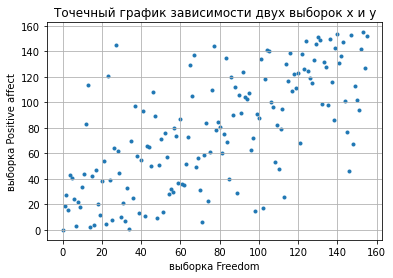

In [116]:
freedom = df['Freedom']
pos_aff = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, pos_aff, marker='.')

Коэффициент корреляции Пирсона: 0.6878506740844934


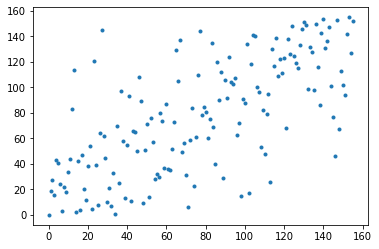

In [117]:
corr, p_value = sts.pearsonr(freedom, pos_aff)
plt.scatter(freedom, pos_aff, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Положительный коэффициент корреляции Пирсона 0,68 говорит о наличии положительной взаимосвязи между freedom, pos_aff. То есть взаимосвязь математически установлена. При увеличении показателя freedom происходит увеличение posirtive_affeect.

### Нормализовать данные колонки Freedom (централизация + масштабирование)

In [121]:
freedom = df['Freedom']
print(statistics.mean(freedom))

77.5


In [125]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [128]:
min(freedom_1)

-77.5

In [129]:
max(freedom_1)

77.5

In [130]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


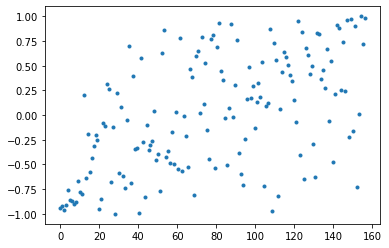

In [131]:
len_column = len(freedom_2) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, freedom_2, marker='.')

### Построить матрицу корреляций для всех колонок таблицы

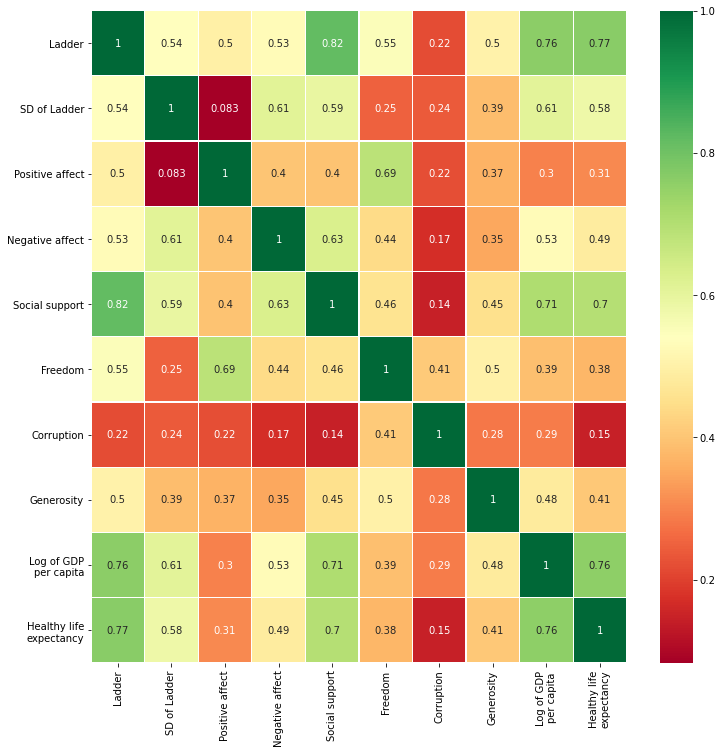

In [118]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

### Загрузить таблицу цен на авокадо: 

In [132]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


### Сделать частотный график колонки AveragePrice. Какое это распределение?

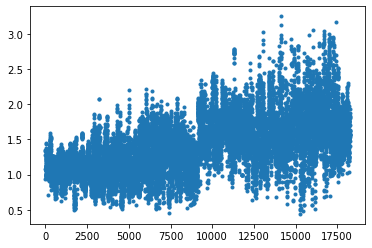

In [133]:
len_column = len(df['AveragePrice']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, df['AveragePrice'], marker='.')

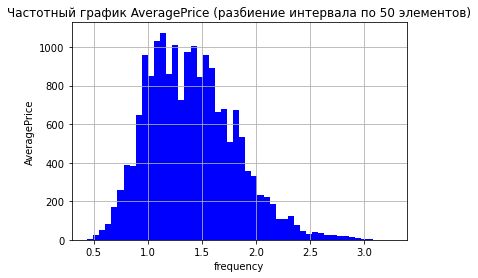

In [134]:
n, bins, patches = plt.hist(df['AveragePrice'], 50, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

График распределения AveragePrice напоминает ***НОРМАЛЬНОЕ*** распределение. Явных выбросов на графике нет.

### Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

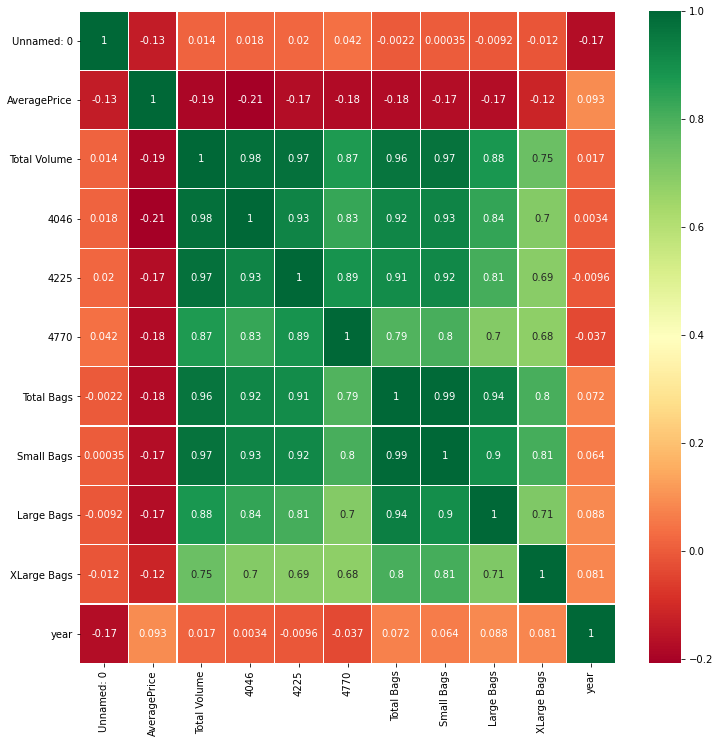

In [135]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Коэффициент корреляции Пирсона: -0.20831704848788463


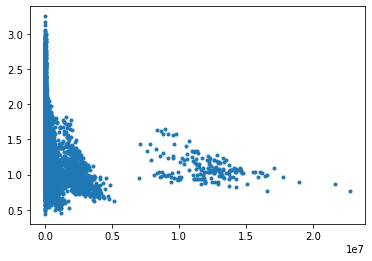

In [139]:
corr, p_value = sts.pearsonr(df['4046'], df['AveragePrice'])
plt.scatter(df['4046'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17292777250933566


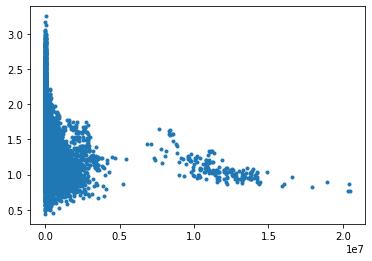

In [140]:
corr, p_value = sts.pearsonr(df['4225'], df['AveragePrice'])
plt.scatter(df['4225'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17944598397976452


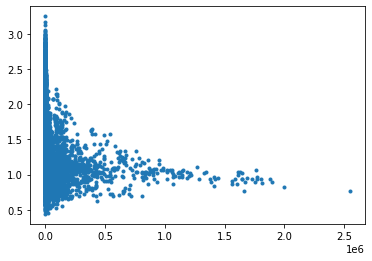

In [141]:
corr, p_value = sts.pearsonr(df['4770'], df['AveragePrice'])
plt.scatter(df['4770'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Во всех случая коэффициент корреляции отрицательный, что говорит об обратной взаимосвязи элементом. То есть при увеличении одного наблюдается уменьшение другого. При этом во всех случаях коэффициент корреляции равен или менее 0,2, что является очень малой величиной и говорит об отсутствии выраженной взаимосвязи между величинами. 